# Base de Dados: Boston House Price Prediction

- Baixe o arquivo no link: [Clique aqui para baixar o arquivo](https://drive.google.com/file/d/1TKIvPZb7d2czqceDbPKv_Adhven7iz7K/view?usp=sharing)

## Descrição
A base de dados **Boston House Price** é um conjunto de dados clássico usado para prever o valor médio de casas em bairros de Boston (EUA) com base em diversas características socioeconômicas e geográficas. Ela contém 506 observações e 14 atributos (incluindo a variável alvo).

## Dicionário de Dados (Atributos + Tradução)

| Nome do Atributo (Inglês)       | Tradução (Português)          | Descrição                                                                 |
|----------------------------------|--------------------------------|---------------------------------------------------------------------------|
| **CRIM**                         | Taxa de Criminalidade         | Taxa de crimes per capita por bairro.                                     |
| **ZN**                           | Proporção de Zonas Residenciais | Proporção de terrenos residenciais zoneados para lotes grandes.          |
| **INDUS**                        | Proporção de Áreas Industriais | Proporção de acres não-varejistas por bairro.                            |
| **CHAS**                         | Limite com o Rio Charles      | Variável dummy (1 se o bairro faz fronteira com o rio; 0 caso contráio). |
| **NOX**                          | Concentração de Óxidos Nitrosos | Concentração de óxidos nítricos (partes por 10 milhões).                 |
| **RM**                           | Número Médio de Quartos       | Número médio de quartos por habitação.                                    |
| **AGE**                          | Idade das Propriedades        | Proporção de unidades ocupadas pelos proprietários construídas antes de 1940. |
| **DIS**                          | Distância dos Empregos        | Distância ponderada até 5 centros empregatícios de Boston.               |
| **RAD**                          | Acesso a Rodovias             | Índice de acessibilidade às rodovias radiais.                            |
| **TAX**                          | Taxa de Imposto Predial       | Taxa de imposto sobre propriedade por $10,000.                           |
| **PTRATIO**                      | Proporção Aluno-Professor     | Proporção de alunos por professor na região.                             |
| **B**                            | Proporção de Afrodescendentes | Proporção de afrodescendentes por bairro (1000*(Bk - 0.63)²).            |
| **LSTAT**                        | % de População de Baixa Renda | Porcentagem de população de baixa renda.                                 |
| **MEDV** (Target)                | Valor Médio das Casas         | Valor médio das casas ocupadas pelos proprietários (em $1,000).          |

---

In [49]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/DataScience"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Carregando a base
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(path + '/housing.csv', delim_whitespace=True, names=names)

<ipython-input-57-7372504eb2b4>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path + '/housing.csv', delim_whitespace=True, names=names)


### Análise Exploratória e Data Cleanning
**Questão 01**: Faça a análise exploratória (Estatísticas e plots) e a limpeza dos dados.

In [58]:
sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

In [59]:
df.info()

# mostrar as 5 primeiras entradas
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [60]:
df.shape

(506, 14)

In [61]:
# Descrição estatística dos dados
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Análise dos Dados

In [62]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 506 entradas (registros) e 14 atributos (variáveis).

Os tipos dos atributos são do tipo:
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [63]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
CRIM,0.0
ZN,0.0
INDUS,0.0
CHAS,0.0
NOX,0.0
RM,0.0
AGE,0.0
DIS,0.0
RAD,0.0
TAX,0.0


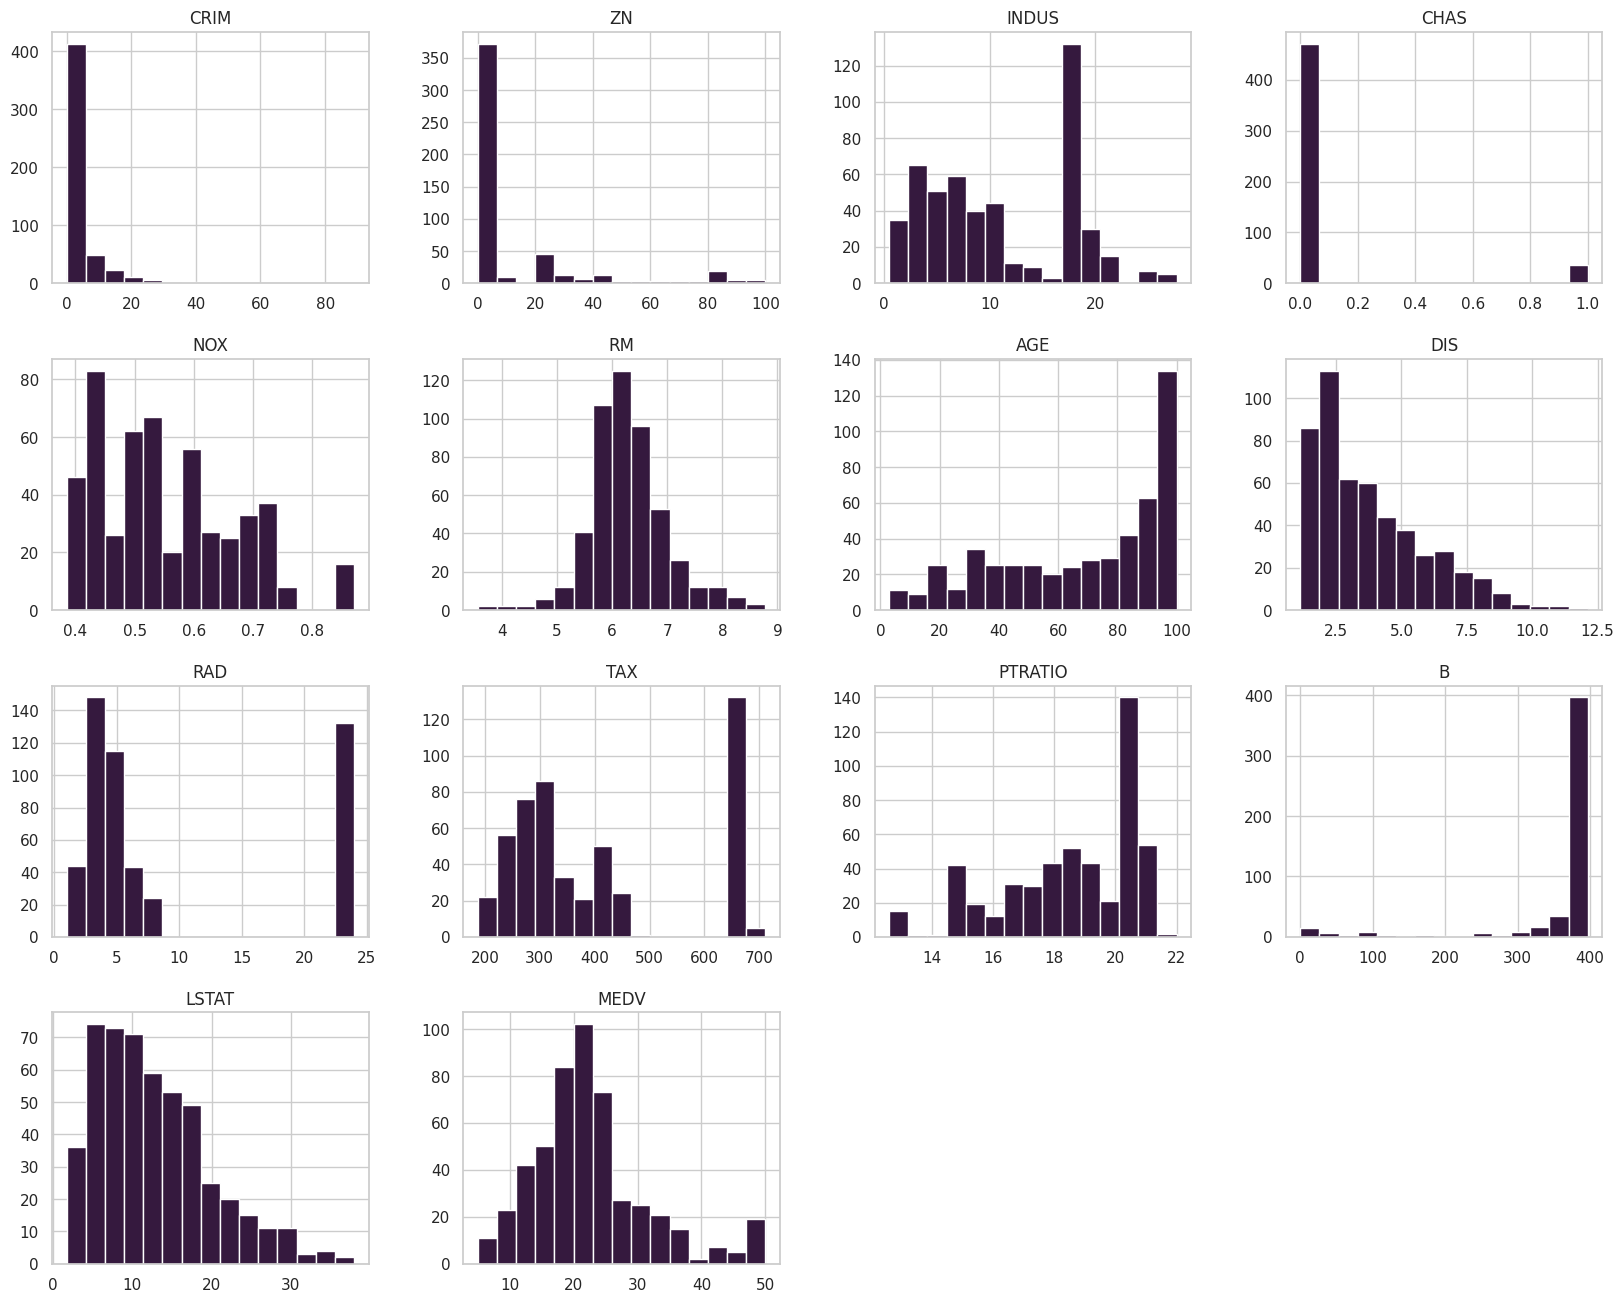

In [64]:
df.hist(bins=15, figsize=(20,16));


In [66]:
media_p = df.mean()
media_p

,0
CRIM,3.613524
ZN,11.363636
INDUS,11.136779
CHAS,0.069170
NOX,0.554695
RM,6.284634
AGE,68.574901
DIS,3.795043
RAD,9.549407
TAX,408.237154


### Regressão Linear Simples
**Questão 02**: Qual a precisão de estimar o valor médio das casas (`MEDV`) através do número médio de quartos (`RM`)?  

###  Regressão Linear Múltipla (2 Variáveis)
**Questão 03**:  Como a taxa de criminalidade (CRIM) e a distância dos empregos (DIS) afetam conjuntamente o valor das casas (MEDV)?
**Questão 04**:  Quais atributos têm maior influência no valor das casas? Faça uma regressão linear com esses atributos.
